<a href="https://colab.research.google.com/github/spencer18001/Clustering-And-Dimensionality-Reduction---Deep-Dive/blob/main/05/0512.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Perform PCA by using eigendecomposition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import random

random.seed(10)
np.random.seed(10)
sns.set_theme()

### 2D dataset example

In [3]:
base_url = 'https://github.com/spencer18001/Clustering-And-Dimensionality-Reduction---Deep-Dive/blob/main'
relative_url = 'data/0512_pca_2d_dataset.csv'
artificial_df = pd.read_csv(f'{base_url}/{relative_url}?raw=1')
artificial_df.head()

,Feature 1,Feature 2
0,0,11.031906
1,2,10.816060
2,4,11.836182
3,6,17.749648
4,8,17.568312


Text(0.5, 1.0, 'Example dataset')

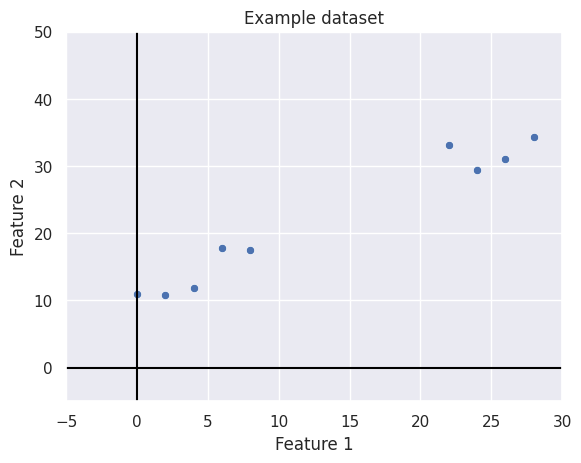

In [4]:
# Plot the dataset

sns.scatterplot(artificial_df,x='Feature 1',y='Feature 2')
plt.hlines(xmin=-5, xmax=30, y=0, color='black')
plt.vlines(ymin=-5, ymax=50, x=0, color='black')
plt.xlim([-5, 30])
plt.ylim([-5, 50])
plt.title('Example dataset')

Text(0.5, 1.0, 'Scaled dataset')

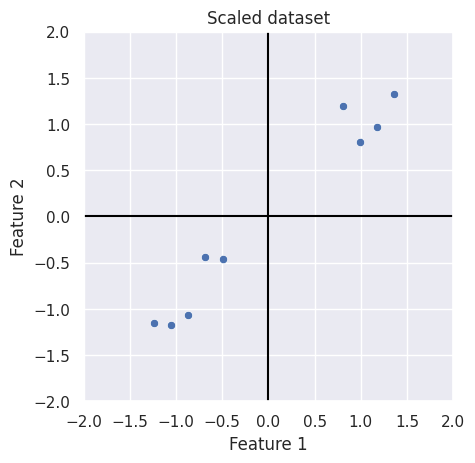

In [5]:
# Scale the data

artificial_df[:] = StandardScaler().fit_transform(artificial_df)

sns.scatterplot(artificial_df,x='Feature 1',y='Feature 2')
plt.hlines(xmin=-5, xmax=30, y=0, color='black')
plt.vlines(ymin=-5, ymax=50, x=0, color='black')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.gca().set_aspect('equal', adjustable='box') # 透過調整整個繪圖框 (box) 的大小來實現指定的縱橫比 (x 軸和 y 軸的比例相同)
plt.title('Scaled dataset')

In [6]:
# Calculate covariance matrix

cov_mtx = artificial_df.cov().to_numpy()
cov_mtx

array([[1.125     , 1.10293497],
       [1.10293497, 1.125     ]])

In [7]:
# Calculate eigenvalues and eigenvectors of the covariance matrix

eigenvalues, eigenvectors = np.linalg.eig(cov_mtx)

In [8]:
eigenvalues

array([2.22793497, 0.02206503])

In [9]:
eigenvectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

Text(0.5, 1.0, 'PC1 and PC2 in original coordinate system')

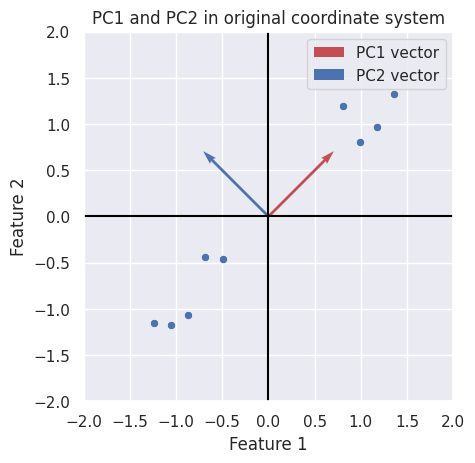

In [10]:
# Plot PCs in the original coordinate system

plt.figure()
sns.scatterplot(artificial_df,x='Feature 1',y='Feature 2')
plt.hlines(xmin=-5, xmax=30, y=0, color='black')
plt.vlines(ymin=-5, ymax=50, x=0, color='black')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
# matplotlib.pyplot.quiver: Plot a 2D field of arrows.
plt.quiver(
    0, 0,
    eigenvectors[:, 0][0],
    eigenvectors[:, 0][1],
    angles='xy', # arrow direction in data coordinates
    scale_units='xy',
    scale=1, color='r',
    label="PC1 vector"
)
plt.quiver(
    0, 0,
    eigenvectors[:, 1][0], eigenvectors[:, 1][1],
    angles='xy', scale_units='xy',
    scale=1, color='b',
    label="PC2 vector"
)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title('PC1 and PC2 in original coordinate system')

Text(0.5, 1.0, 'PC1 and PC2 in original coordinate system')

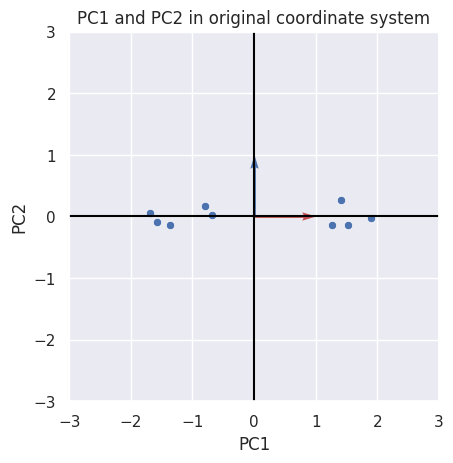

In [11]:
# Perform change of basis

transformed_data = eigenvectors.T @ artificial_df.to_numpy().T
transformed_df = pd.DataFrame(transformed_data.T, columns=['PC1', 'PC2'])

# Change basis for eigenvectors

transformed_axis = eigenvectors.T @ eigenvectors

plt.figure()
sns.scatterplot(transformed_df,x='PC1',y='PC2')
plt.hlines(xmin=-5, xmax=30, y=0, color='black')
plt.vlines(ymin=-5, ymax=50, x=0, color='black')
plt.quiver(
    0, 0,
    transformed_axis[0][0],
    transformed_axis[0][1],
    angles='xy', scale_units='xy',
    scale=1, color='r',
    label="PC1 vector"
)
plt.quiver(
    0, 0,
    transformed_axis[1][0],
    transformed_axis[1][1],
    angles='xy', scale_units='xy',
    scale=1, color='b',
    label="PC2 vector"
)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.gca().set_aspect('equal', adjustable='box')
plt.title('PC1 and PC2 in original coordinate system')

### 3D - case

In [12]:
def plot_data_and_axis(data, eigenvectors=None, axis_min=None,
                        axis_max=None, figsize=None):

    """
    This function plots data in a 3D coordinate system.
    This function also plots coordinate system axis or arbitrary
    set of vectors.

    :param data: numpy dataset with 3 features
    :param eigenvectors: transposed eigenvector matrix
    :param axis_min: min value for each axis on the plot
    :param axis_max: max value for each axis on the plot
    :return:
    """

    # Create 3D figure
    fig = plt.figure(figsize=figsize)
    # (nrows, ncols, index)
    # The subplot will take the index position on a grid with nrows rows and ncols columns.
    # index starts at 1 in the upper left corner and increases to the right.
    ax = fig.add_subplot(111,
                         projection='3d') # The projection type of the subplot

    # Plot the data
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], alpha=0.2)

    # Set axis labels
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

    # Set minimum and maximum value for axis
    if axis_min and axis_max:
        ax.set_xlim(axis_min, axis_max)
        ax.set_ylim(axis_min, axis_max)
        ax.set_zlim(axis_min, axis_max)

    ax.view_init(elev=20, azim=-35, roll=0)

    # Choose which axis will be plotted (arrow tips)
    if eigenvectors is not None:
        plot_vectors = eigenvectors
    else:
        plot_vectors = [
            [1, 0, 0],
            [0, 1, 0],
            [0, 0, 1]
        ]

    # Always set origin at [0,0,0] (arrow starting point)
    origin = [0, 0, 0]

    # Iterate over coordinate system arrows (three of them)
    for i, component in enumerate(plot_vectors):
        # Plot arrow
        ax.quiver(
            origin[0],
            origin[1],
            origin[2],
            component[0],
            component[1],
            component[2],
            color=['r', 'g', 'b'][i],
            lw=2
        )

    plt.show()

In [13]:
# Create 2D normaly distributed data
mean = np.array([0,0])
cov = np.array([[1,0.5],[0.5,1]])

# Create feature z
x_y_data = np.random.multivariate_normal(mean, cov, 500) # (500,2)
z_col = 1.5*x_y_data[:,1] # (500,)

# Merge z col with x and y
np_data_3D = np.column_stack([x_y_data, z_col]) # (500,3)

# Create dataframe in order to display data
df_3D = pd.DataFrame(np_data_3D, columns=['x', 'y', 'z'])
df_3D.head()

,x,y,z
0,-1.510827,-0.795548,-1.193322
1,1.342548,1.334164,2.001246
2,-0.178050,-0.898136,-1.347203
3,-0.284214,-0.175666,-0.263498
4,0.083584,-0.091017,-0.136525


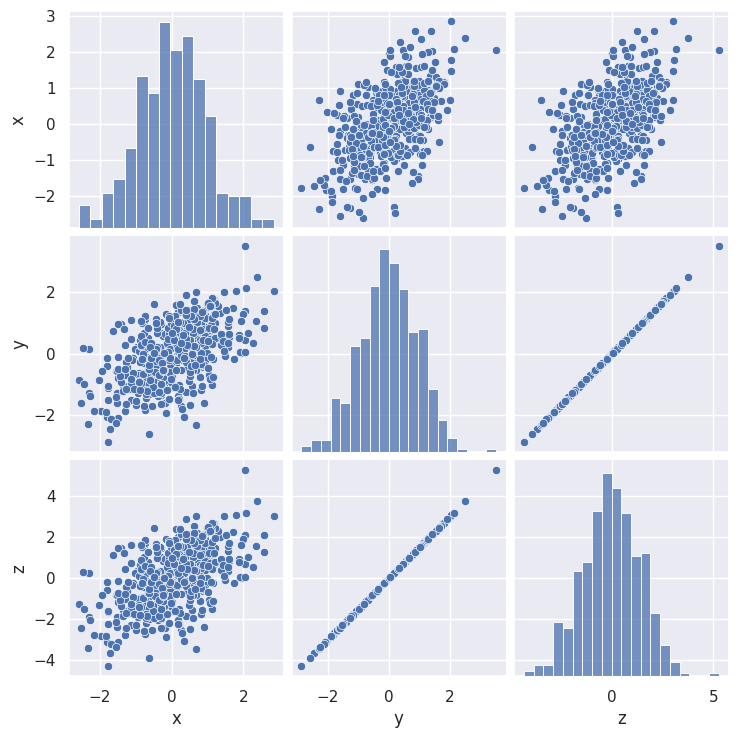

In [14]:
# seaborn.pairplot: Plot pairwise relationships in a dataset.
sns.pairplot(df_3D)

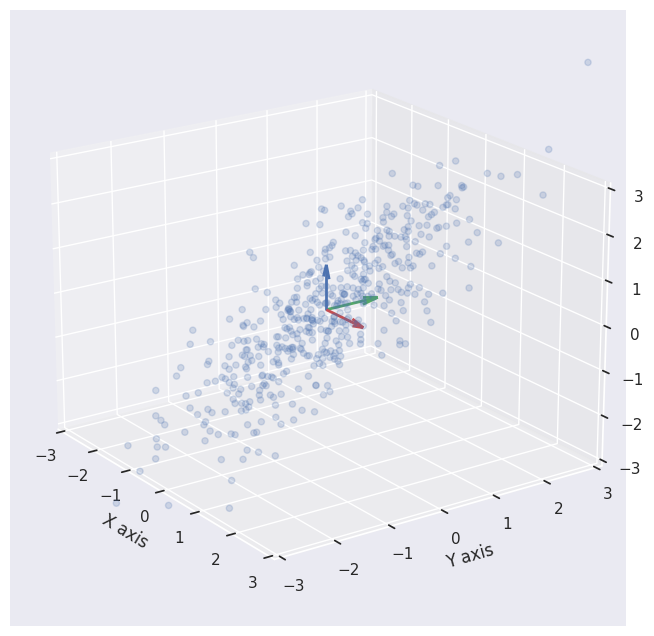

In [15]:
# Plot the data in the original coordinate system

plot_data_and_axis(
    data=np_data_3D,
    axis_min = -3,
    axis_max=3,
    figsize=(8,8)
)

In [16]:
# Calculate covariance matrix

cov_mtx = df_3D.cov().to_numpy()
cov_mtx

array([[0.90523183, 0.4721996 , 0.7082994 ],
       [0.4721996 , 0.88894324, 1.33341486],
       [0.7082994 , 1.33341486, 2.00012229]])

In [17]:
# Calculate eigenvalues and eigenvectors of covariance matrix

eigenvalues, eigenvectors = np.linalg.eig(cov_mtx)

In [18]:
eigenvalues

array([5.90029887e-01, 3.20426748e+00, 4.31088651e-16])

In [19]:
np.set_printoptions(suppress=True)
eigenvalues / np.sum(eigenvalues)*100

array([15.55043872, 84.44956128,  0.        ])

In [20]:
eigenvectors

array([[-0.93777861,  0.34723374,  0.        ],
       [ 0.19261062,  0.52018598, -0.83205029],
       [ 0.28891594,  0.78027897,  0.5547002 ]])

In [21]:
sort_idx = np.flip(np.argsort(eigenvalues))
sort_idx

array([1, 0, 2])

In [22]:
eigenvalues = eigenvalues[sort_idx]
eigenvalues

array([3.20426748, 0.59002989, 0.        ])

In [23]:
eigenvectors = eigenvectors[:, sort_idx]
eigenvectors

array([[ 0.34723374, -0.93777861,  0.        ],
       [ 0.52018598,  0.19261062, -0.83205029],
       [ 0.78027897,  0.28891594,  0.5547002 ]])

In [24]:
eigenvectors.T

array([[ 0.34723374,  0.52018598,  0.78027897],
       [-0.93777861,  0.19261062,  0.28891594],
       [ 0.        , -0.83205029,  0.5547002 ]])

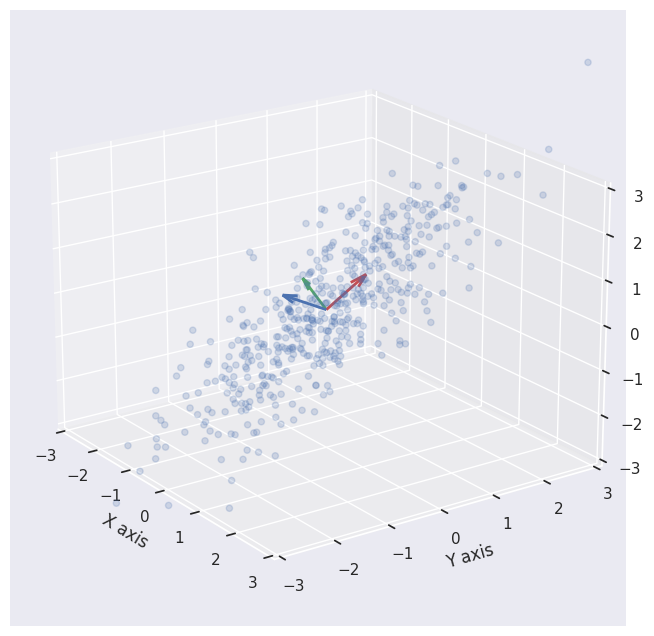

In [25]:
# Plot the data and the principal components

plot_data_and_axis(
    data=np_data_3D,
    eigenvectors=eigenvectors.T,
    axis_min=-3,
    axis_max=3,
    figsize=(8,8)
)

In [26]:
# Transform data to 2D

transformation_matrix = eigenvectors[:, :-1].T # (2,3)
transformed_data = transformation_matrix @ df_3D.to_numpy().T # (2,500)

In [30]:
transformed_df = pd.DataFrame(transformed_data.T, columns=['PC1', 'PC2'])

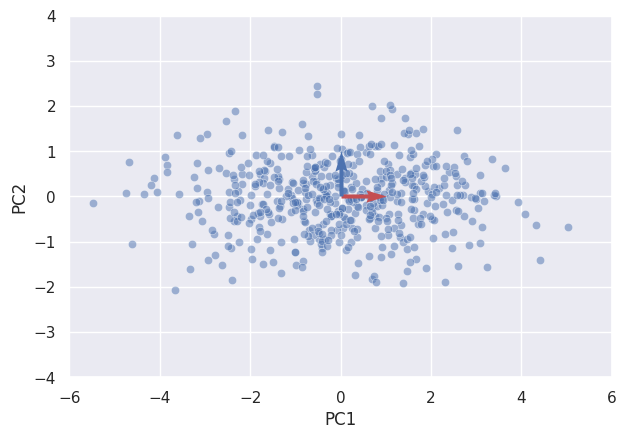

In [31]:
# Plot reduced data

plt.figure(figsize=(7,7))
sns.scatterplot(transformed_df,x='PC1',y='PC2', alpha=0.5)
plt.quiver(0, 0, 1, 0, angles='xy', scale_units='xy', scale=1, color='r', label="PC1 vector")
plt.quiver(0, 0,0, 1, angles='xy', scale_units='xy', scale=1, color='b', label="PC2 vector")
plt.xlim([-6, 6])
plt.ylim([-4, 4])
plt.gca().set_aspect('equal', adjustable='box')